In [1]:
import cv2 
from PIL import Image, ImageChops

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
img = Image.open("../SPMpadded/a1.png") 
img2 = Image.open("../SPMpadded_lined/a1.png") 
print(type(img))

<class 'PIL.PngImagePlugin.PngImageFile'>


In [4]:
img.show()
img2.show()

In [5]:
npimg = np.array(img) 
npimg2 = np.array(img2)

In [6]:
print(npimg.shape)

(1400, 1400, 3)


In [7]:
img.show()

In [8]:

Limg = img.copy().convert("L")
npLimg = np.array(Limg)
npLimg[npLimg < 128] = 0
npLimg[npLimg >= 128] = 255
i = Image.fromarray(npLimg).convert('1')
i.save("tmp.png") 

In [9]:
def converter(image,targetpath):
    x = np.array(image.copy().convert("L")) 
    x[x<128] = 0 
    x[x>=128] = 255 
    i = Image.fromarray(x).convert('1') 
    i.save(targetpath)
# converter(img)
import os 
for filename in os.listdir("../SPMpadded_lined/"):
    if filename.endswith("png"):
        im = Image.open("../SPMpadded_lined/"+filename)
        converter(im, "../SPMbinarized_lined/"+filename)
    

In [10]:
# type(npLimg[0,0])

In [11]:
# print(npLimg[300:310,400:410])

In [12]:
# plt.imshow(npLimg)

In [13]:
# plt.show()

In [14]:
mat = cv2.imread('../SPMbinarized/a1.png', cv2.IMREAD_GRAYSCALE) 
print(type(mat))

<class 'numpy.ndarray'>


In [15]:
print(mat.shape)

(1400, 1400)


In [16]:
print(type(mat[0,0]))

<class 'numpy.uint8'>


In [17]:
im_gray = cv2.imread("../SPMpadded/a1.png", cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# determines the threshold automatically from the image using Otsu's method
cv2.imwrite('./tmp.png', im_bw) 
print(thresh)

168.0


In [18]:
print(im_bw.shape)

(1400, 1400)


In [19]:
print(im_bw[0,0])
print(type(im_bw[0,0]))

255
<class 'numpy.uint8'>


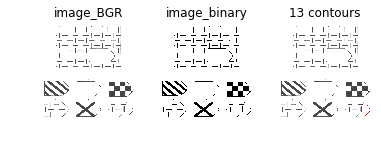

In [20]:
im_bw_inv = np.zeros(im_bw.shape, dtype=np.uint8) 
im_bw_inv[im_bw == 255] = 0 
im_bw_inv[im_bw == 0] = 255
contours = cv2.findContours(im_bw_inv.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
# def findContours(image, mode, method, contours=None, hierarchy=None, offset=None):
# """
# 检测二值图像的轮廓信息
# Argument:
#     image: 待检测图像
#     mode: 轮廓检索模式
#     method: 轮廓近似方法
#     contours: 检测到的轮廓；每个轮廓都存储为点矢量
#     hierarchy: 
#     offset: 轮廓点移动的偏移量
# """
image = cv2.imread("../SPMpadded/a1.png") 
image_RGB = image.copy() 

for c in contours:
    cv2.drawContours(image, [c], -1, (255, 0, 0), 2)
    break
    
    
# display BGR image
plt.subplot(1, 3, 1)
plt.imshow(image_RGB)
plt.axis('off')
plt.title('image_BGR')

# display binary image
plt.subplot(1, 3, 2)
plt.imshow(im_bw, cmap='gray')
plt.axis('off')
plt.title('image_binary')

# display contours
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.axis('off')
plt.title('{} contours'.format(len(contours)))

plt.show()

In [21]:
cv2.imwrite("./contour.png", image)

True

In [22]:
print(np.sum(im_bw / 255))

1788464.0


In [23]:
print(np.prod(im_bw.shape))

1960000


In [24]:
print(len(contours))

13


In [25]:
print(len(contours[0]))

197


In [26]:
print(contours[0])

[[[ 977 1132]]

 [[ 977 1341]]

 [[1009 1341]]

 [[1010 1342]]

 [[1011 1341]]

 [[1014 1341]]

 [[1015 1342]]

 [[1016 1341]]

 [[1019 1341]]

 [[1020 1342]]

 [[1025 1342]]

 [[1026 1341]]

 [[1027 1342]]

 [[1144 1342]]

 [[1145 1343]]

 [[1146 1343]]

 [[1147 1342]]

 [[1148 1342]]

 [[1149 1343]]

 [[1150 1342]]

 [[1151 1343]]

 [[1152 1342]]

 [[1154 1342]]

 [[1155 1343]]

 [[1156 1342]]

 [[1172 1342]]

 [[1173 1343]]

 [[1174 1343]]

 [[1175 1342]]

 [[1180 1342]]

 [[1181 1343]]

 [[1182 1342]]

 [[1204 1342]]

 [[1205 1343]]

 [[1206 1342]]

 [[1208 1342]]

 [[1209 1343]]

 [[1210 1343]]

 [[1211 1342]]

 [[1219 1342]]

 [[1220 1343]]

 [[1221 1343]]

 [[1222 1342]]

 [[1223 1343]]

 [[1225 1343]]

 [[1226 1342]]

 [[1227 1342]]

 [[1228 1343]]

 [[1233 1343]]

 [[1234 1342]]

 [[1235 1343]]

 [[1238 1343]]

 [[1239 1342]]

 [[1240 1342]]

 [[1241 1341]]

 [[1242 1341]]

 [[1244 1339]]

 [[1244 1338]]

 [[1245 1337]]

 [[1246 1337]]

 [[1249 1334]]

 [[1250 1334]]

 [[1252 

In [27]:
print(contours[0].shape)

(197, 1, 2)


In [28]:
for i in range(len(contours)):
    print(contours[i].shape)

(197, 1, 2)
(125, 1, 2)
(134, 1, 2)
(45, 1, 2)
(55, 1, 2)
(34, 1, 2)
(155, 1, 2)
(129, 1, 2)
(140, 1, 2)
(58, 1, 2)
(61, 1, 2)
(17, 1, 2)
(74, 1, 2)


In [29]:
with open("../SPM coordinates.txt", "r") as f: 
    for line in f:
        print(line)

419	133		245	193

728	133		245	193

419	382		245	193

728	382		245	193

83	840		245	193

540	847		245	193

991	852		245	193

73	1138		245	193

532	1137		245	193

984	1140		245	193



424	114		248	194

747	114		248	194

424	393		248	194

747	393		248	194

82	840		248	194

536	847		248	194

987	854		248	194

76	1137		248	194

527	1137		248	194

983	1141		248	194



450	120		233	187

744	120		233	187

450	377		233	187

744	377		233	187

99	862		233	187

541	866		233	187

974	868		233	187

94	1148		233	187

532	1145		233	187

970	1147		233	187



427	127		248	195

739	127		248	195

427	385		248	195

739	385		248	195

78	839		248	195

536	840		248	195

987	839		248	195

77	1135		248	195

535	1137		248	195

985	1138		248	195



430	119		247	194

749	119		247	194

430	391		247	194

749	391		247	194

73	838		247	194

535	848		247	194

990	850		247	194

73	1134		247	194

530	1134		247	194

982	1139		247	194



428	121		248	194

748	121		248	194

428	393		248	194

748	393		248	194

79	844		248	1

In [39]:
coordinates = [] 
with open("../SPM coordinates.txt", "r") as f: 
    for i,line in enumerate(f):
#         if i % 10 == 0:
            
        coordinates.append([list(map(int,line.split()))])
print(coordinates[0])
print(len(coordinates)) 

[[419, 133, 245, 193]]
912


In [40]:
print(coordinates[21]==[[]])

True


In [41]:
tmp = ["a", "b", "c", "d", "e"] 
out = "[" 
for i, v in enumerate(tmp):
    for j in range(1,13): 
        out += "'" + v + str(j) + ".png" + "', " 
out += "]"
print(out)

['a1.png', 'a2.png', 'a3.png', 'a4.png', 'a5.png', 'a6.png', 'a7.png', 'a8.png', 'a9.png', 'a10.png', 'a11.png', 'a12.png', 'b1.png', 'b2.png', 'b3.png', 'b4.png', 'b5.png', 'b6.png', 'b7.png', 'b8.png', 'b9.png', 'b10.png', 'b11.png', 'b12.png', 'c1.png', 'c2.png', 'c3.png', 'c4.png', 'c5.png', 'c6.png', 'c7.png', 'c8.png', 'c9.png', 'c10.png', 'c11.png', 'c12.png', 'd1.png', 'd2.png', 'd3.png', 'd4.png', 'd5.png', 'd6.png', 'd7.png', 'd8.png', 'd9.png', 'd10.png', 'd11.png', 'd12.png', 'e1.png', 'e2.png', 'e3.png', 'e4.png', 'e5.png', 'e6.png', 'e7.png', 'e8.png', 'e9.png', 'e10.png', 'e11.png', 'e12.png', ]


In [42]:



import os 
data = [] 
dirs = sorted(os.listdir("../SPMpadded/"),)
filenames = ['a1.png', 'a2.png', 'a3.png', 'a4.png', 'a5.png', 'a6.png', 'a7.png', 'a8.png', 'a9.png', 'a10.png', 'a11.png', 'a12.png', 'b1.png', 'b2.png', 'b3.png', 'b4.png', 'b5.png', 'b6.png', 'b7.png', 'b8.png', 'b9.png', 'b10.png', 'b11.png', 'b12.png', 'c1.png', 'c2.png', 'c3.png', 'c4.png', 'c5.png', 'c6.png', 'c7.png', 'c8.png', 'c9.png', 'c10.png', 'c11.png', 'c12.png', 'd1.png', 'd2.png', 'd3.png', 'd4.png', 'd5.png', 'd6.png', 'd7.png', 'd8.png', 'd9.png', 'd10.png', 'd11.png', 'd12.png', 'e1.png', 'e2.png', 'e3.png', 'e4.png', 'e5.png', 'e6.png', 'e7.png', 'e8.png', 'e9.png', 'e10.png', 'e11.png', 'e12.png']
# print(dirs)
for filename in filenames:
#     if filename.endswith("png"):
#         im = Image.open("../SPMpadded_lined/"+filename)
#         converter(im, "../SPMbinarized_lined/"+filename)
    im_gray = cv2.imread("../SPMpadded/"+filename, cv2.IMREAD_GRAYSCALE) 
    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    data.append(im_bw) 




# im_gray = cv2.imread("../SPMpadded/a1.png", cv2.IMREAD_GRAYSCALE)
# (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# # determines the threshold automatically from the image using Otsu's method
# cv2.imwrite('./tmp.png', im_bw) 
# print(thresh)

['a1.png', 'a10.png', 'a11.png', 'a12.png', 'a2.png', 'a3.png', 'a4.png', 'a5.png', 'a6.png', 'a7.png', 'a8.png', 'a9.png', 'b1.png', 'b10.png', 'b11.png', 'b12.png', 'b2.png', 'b3.png', 'b4.png', 'b5.png', 'b6.png', 'b7.png', 'b8.png', 'b9.png', 'c1.png', 'c10.png', 'c11.png', 'c12.png', 'c2.png', 'c3.png', 'c4.png', 'c5.png', 'c6.png', 'c7.png', 'c8.png', 'c9.png', 'd1.png', 'd10.png', 'd11.png', 'd12.png', 'd2.png', 'd3.png', 'd4.png', 'd5.png', 'd6.png', 'd7.png', 'd8.png', 'd9.png', 'e1.png', 'e10.png', 'e11.png', 'e12.png', 'e2.png', 'e3.png', 'e4.png', 'e5.png', 'e6.png', 'e7.png', 'e8.png', 'e9.png']


In [43]:
print(len(data)) 

60


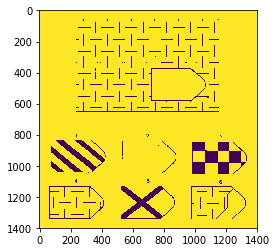

In [44]:
plt.imshow(data[0]) 
plt.show()

In [45]:
grouped_coor = [] 
group = []
for i,v in enumerate(coordinates):
    if v == [[]]:
        grouped_coor.append(group)
        group = []
        continue
    group.append(v)
print(len(grouped_coor))

60


In [46]:
print(len(grouped_coor[0]))
print(len(grouped_coor[23]))
print(len(grouped_coor[24]))
print(len(grouped_coor[-1]))
print(grouped_coor[-2])

10
10
17
17
[[[331, 104, 222, 173]], [[589, 104, 222, 173]], [[848, 104, 222, 173]], [[331, 273, 222, 173]], [[589, 273, 222, 173]], [[848, 273, 222, 157]], [[331, 442, 222, 173]], [[589, 442, 222, 173]], [[848, 442, 222, 173]], [[51, 883, 222, 173]], [[391, 883, 222, 173]], [[736, 882, 222, 173]], [[1079, 882, 222, 173]], [[50, 1158, 222, 173]], [[390, 1157, 222, 173]], [[735, 1156, 222, 173]], [[1079, 1157, 222, 173]]]


In [47]:

dataset = {"4cells":[], "9cells":[]}

idx = 0
for i in range(24):
    
    dataEntry = []
    for j in range(10):
        x, y, w, h = grouped_coor[i][j][0]
        dataEntry.append(data[i][y:y+h,x:x+w].copy())
    dataset["4cells"].append(dataEntry)
    
    
for i in range(24,60):
    dataEntry = [] 
    for j in range(17):
        x, y, w, h = grouped_coor[i][j][0]
        dataEntry.append(data[i][y:y+h,x:x+w].copy()) 
    dataset["9cells"].append(dataEntry)
    

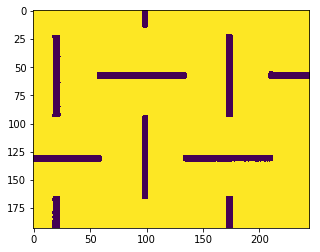

In [48]:
plt.imshow(dataset["4cells"][0][0])
plt.show()

In [49]:
import pickle

with open("data.pkl","wb") as f: 
    pickle.dump(dataset,f) 

In [50]:
import pickle
with open("data.pkl", 'rb') as f: 
    dataset2 = pickle.load(f) 
    

In [51]:
print(len(dataset2["4cells"]))

24


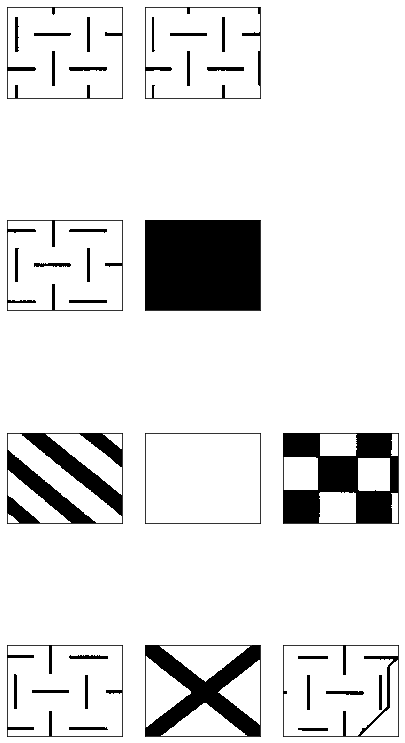

In [52]:
from utils import visualize 
visualize(dataset2["4cells"][0])